# Libraries

In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=656aeec08bed324f9c96f9f11a137f513d207162b647a4de756334127d547b4a
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [ ]:
## data handaling library
import pandas as pd
import numpy as np

# Library for mounting drive
#from google.colab import drive

# for text embeddings
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

# text-cleaning
from cleantext.sklearn import CleanTransformer

# Library for models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error as MSE, plot_roc_curve

from xgboost import XGBClassifier
import scipy


import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
import gensim

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Extraction

In [ ]:
import numpy as np 
import pandas as pd 
import os

path="/content/drive/MyDrive/Master Project 295A/baseline_dataset/baseline_dataset_2"

data = []
for root, folder, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            fullname = os.path.join(root, file)
            data.append(fullname)

In [ ]:
text = []
for i in range(len(data)):
  with open(data[i], 'r') as f:
    document = f.readlines()
    text.append(document)

In [ ]:
category = []
for i in range(len(data)):
  file = data[i].split('/')[-1].lower()
  category.append(file.split('_')[0].lower())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame({'Title': data,
     'Text': text,
     'Category': category
    })

NameError: ignored

In [ ]:
df.head()
df.to_csv("./baseline_dataset_2/baseline_dataset_2_final.csv")

OSError: ignored

# Creating CSV from datasets

In [ ]:
# ! cp "/content/drive/MyDrive/Master Project 295A/dataset/news_article/news_text.csv" "/content/drive/MyDrive/Master Project 295A/dataset/processed_files/news_text.csv"

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
path = '/content/drive/MyDrive/Master Project 295A/dataset/processed_files'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

# df_from_each_file = (pd.read_csv(f, index_col=[0]) for f in all_files)
df_from_each_file = (pd.read_csv(f)[:200] for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
concatenated_df

,Unnamed: 0,category,text
0,0.0,book,﻿How can we free ourselves from mental sufferi...
1,1.0,book,"﻿ The New Girl Webster Grove, Book 1 Tracie ..."
2,2.0,book,﻿DEATH BY CHOCOLATE Copyright ©2011 Sally Bern...
3,3.0,book,﻿ Always Know What to Say Easy Ways to Appro...
4,4.0,book,﻿ A Little Bit of Déjà Vu The Return to Redem...
...,...,...,...
618,195.0,legal,Mutual Non-Disclosure Agreement\nThis AGREEMEN...
619,196.0,legal,Non-Disclosure Agreement\n Moscow ___.___.2016...
620,197.0,legal,[European Space Agency]\nand\n[Contractor]\nNo...
621,198.0,legal,NON DISCLOSURE AGREEMENT\nAGREEMENT between Am...


In [ ]:
concatenated_df["category"].unique()

array(['book', 'resume', 'news_article', 'publication', 'legal'],
      dtype=object)

In [ ]:
concatenated_df = concatenated_df.drop(["Unnamed: 0"], axis=1)

In [ ]:
concatenated_df["category"].value_counts()

resume          200
legal           200
news_article    100
publication      73
book             50
Name: category, dtype: int64

In [ ]:
concatenated_df

,category,text
0,book,﻿How can we free ourselves from mental sufferi...
1,book,"﻿ The New Girl Webster Grove, Book 1 Tracie ..."
2,book,﻿DEATH BY CHOCOLATE Copyright ©2011 Sally Bern...
3,book,﻿ Always Know What to Say Easy Ways to Appro...
4,book,﻿ A Little Bit of Déjà Vu The Return to Redem...
...,...,...
618,legal,Mutual Non-Disclosure Agreement\nThis AGREEMEN...
619,legal,Non-Disclosure Agreement\n Moscow ___.___.2016...
620,legal,[European Space Agency]\nand\n[Contractor]\nNo...
621,legal,NON DISCLOSURE AGREEMENT\nAGREEMENT between Am...


In [ ]:
concatenated_df.to_csv("merged_data_11_Apr.csv", index=False)

In [ ]:
# news = pd.read_csv("/content/drive/MyDrive/Master Project 295A/dataset/processed_files/news_text.csv", index_col=[0])
# news

In [ ]:
df = concatenated_df

In [ ]:
df.shape

(200, 2)

In [ ]:
df.tail()

,category,text
0,book,﻿How can we free ourselves from mental sufferi...
1,book,"﻿ The New Girl Webster Grove, Book 1 Tracie ..."
2,book,﻿DEATH BY CHOCOLATE Copyright ©2011 Sally Bern...
3,book,﻿ Always Know What to Say Easy Ways to Appro...
4,book,﻿ A Little Bit of Déjà Vu The Return to Redem...


# Data Cleaning

In [ ]:
cleaner = CleanTransformer(no_punct=True, lower=True,fix_unicode=True,no_line_breaks=True)

In [ ]:
df['cleaned_text'] = cleaner.transform(df['text'])

In [ ]:
df.head()

,category,text,cleaned_text
0,book,﻿How can we free ourselves from mental sufferi...,how can we free ourselves from mental sufferin...
1,book,"﻿ The New Girl Webster Grove, Book 1 Tracie ...",the new girl webster grove book 1 tracie pucke...
2,book,﻿DEATH BY CHOCOLATE Copyright ©2011 Sally Bern...,death by chocolate copyright ©️2011 sally bern...
3,book,﻿ Always Know What to Say Easy Ways to Appro...,always know what to say easy ways to approach ...
4,book,﻿ A Little Bit of Déjà Vu The Return to Redem...,a little bit of deja vu the return to redempti...


In [ ]:
data_cleaned = df.drop(['text'],axis = 1)

In [ ]:
data_cleaned.head()

,category,cleaned_text
0,book,how can we free ourselves from mental sufferin...
1,book,the new girl webster grove book 1 tracie pucke...
2,book,death by chocolate copyright ©️2011 sally bern...
3,book,always know what to say easy ways to approach ...
4,book,a little bit of deja vu the return to redempti...


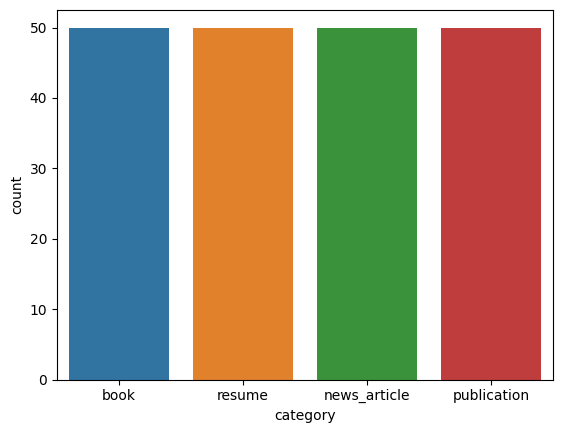

In [ ]:
ax = sns.countplot(x="category", data=data_cleaned)

In [ ]:
data_cleaned["category"] = data_cleaned["category"].astype('category')

In [ ]:
data_cleaned["category"] = data_cleaned["category"].cat.codes
data_cleaned.head()

,category,cleaned_text
0,0,how can we free ourselves from mental sufferin...
1,0,the new girl webster grove book 1 tracie pucke...
2,0,death by chocolate copyright ©️2011 sally bern...
3,0,always know what to say easy ways to approach ...
4,0,a little bit of deja vu the return to redempti...


In [ ]:
data_cleaned.to_csv("/content/drive/MyDrive/Master Project 295A/dataset/dataset_4class.csv")

# Data Analysis

In [ ]:
# Splitting the dataset by label
data_s = df[df['Category'] == 'sport'] 
data_t = df[df['Category'] == 'technologie'] 
data_g = df[df['Category'] == 'graphics'] 
data_e = df[df['Category'] == 'entertainment'] 
data_s1 = df[df['Category'] == 'space'] 
data_f= df[df['Category'] == 'food'] 
data_m = df[df['Category'] == 'medical'] 
data_p = df[df['Category'] == 'politics']
data_h = df[df['Category'] == 'historical'] 
data_b = df[df['Category'] == 'business']

KeyError: ignored

In [ ]:
# Distribution of average word-length in description
data_s_avg = data_s['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_t_avg = data_t['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_g_avg = data_g['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_e_avg = data_e['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_s1_avg = data_s1['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_f_avg = data_f['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_m_avg = data_m['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_p_avg = data_p['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(5, 2, figsize = (8, 15), sharey = False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1.5)
sns.histplot(x = data_s_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Sport')
sns.histplot(x = data_t_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Technologie')
sns.histplot(x = data_g_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Graphics')
sns.histplot(x = data_e_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Entertainment')
sns.histplot(x = data_s1_avg, bins = 20, ax = ax[2, 0]).set_title('Class: Space')
sns.histplot(x = data_f_avg, bins = 20, ax = ax[2, 1]).set_title('Class: Food')
sns.histplot(x = data_m_avg, bins = 20, ax = ax[3, 0]).set_title('Class: Medical')
sns.histplot(x = data_p_avg, bins = 20, ax = ax[3, 1]).set_title('Class: Politics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[4, 0]).set_title('Class: Historical')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[4, 1]).set_title('Class: Business')


fig.suptitle("Distribution of average word-length in description")
for i in range(10):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

# Embedding using Tfidf

## Splitting Data

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(data_cleaned['cleaned_text'].values,
                                                     data_cleaned['category'].values,
                                                     test_size=0.2, random_state=123,
                                                     stratify=data_cleaned['category'].values)

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

## Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(tfidf_train_vectors,y_train)
y_pred_rf = rf_classifier.predict(tfidf_test_vectors)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 600, num = 10)]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
   rf.fit(tfidf_train_vectors, y_train)
   train_pred = rf.predict(tfidf_train_vectors)
   mse_train = MSE(y_train, train_pred)
   train_results.append(mse_train)
   
   test_pred = rf.predict(tfidf_test_vectors)
   mse_test = MSE(y_test, test_pred)
   test_results.append(mse_test)
 
plt.figure(figsize = (8, 5))
plt.plot(n_estimators, train_results, 'b', label = "Training MSE")
plt.plot(n_estimators, test_results, 'r', label = "Validation MSE")
plt.legend(loc='best')
plt.ylabel("MSE score")
plt.xlabel("n_estimators")
plt.show()

NameError: ignored

In [ ]:
max_depths = [int(x) for x in np.linspace(start = 30, stop = 120, num = 10)]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
   rf.fit(tfidf_train_vectors, y_train)
   train_pred = rf.predict(tfidf_train_vectors)
   mse_train = MSE(y_train, train_pred)
   train_results.append(mse_train)
   
   test_pred = rf.predict(tfidf_test_vectors)
   mse_test = MSE(y_test, test_pred)
   test_results.append(mse_test)

plt.figure(figsize = (8, 5))
plt.plot(max_depths, train_results, 'b', label = "Training MSE")
plt.plot(max_depths, test_results, 'r', label = "Validation MSE")
plt.legend(loc='best')
plt.ylabel("MSE score")
plt.xlabel("max_depth")
plt.show()

In [ ]:
max_features = ['auto', 'sqrt', 'log2']

train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
   rf.fit(tfidf_train_vectors, y_train)
   train_pred = rf.predict(tfidf_train_vectors)
   mse_train = MSE(y_train, train_pred)
   train_results.append(mse_train)
   
   test_pred = rf.predict(tfidf_test_vectors)
   mse_test = MSE(y_test, test_pred)
   test_results.append(mse_test)

plt.figure(figsize = (8, 5))
plt.plot(max_features, train_results, 'b', label = "Training MSE")
plt.plot(max_features, test_results, 'r', label = "Validation MSE")
plt.legend(loc='best')
plt.ylabel("MSE score")
plt.xlabel("max_feature")
plt.show()

In [ ]:
min_samples_splits = [2, 3, 4, 5, 6, 7, 8, 9, 10]

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
   rf.fit(tfidf_train_vectors, y_train)
   train_pred = rf.predict(tfidf_train_vectors)
   mse_train = MSE(y_train, train_pred)
   train_results.append(mse_train)
   
   test_pred = rf.predict(tfidf_test_vectors)
   mse_test = MSE(y_test, test_pred)
   test_results.append(mse_test)

plt.figure(figsize = (8, 5))
plt.plot(min_samples_splits, train_results, 'b', label = "Training MSE")
plt.plot(min_samples_splits, test_results, 'r', label = "Validation MSE")
plt.legend(loc='best')
plt.ylabel("MSE score")
plt.xlabel("min_samples_split")
plt.show()

In [ ]:
min_samples_leafs = [2, 3, 4, 5, 6, 7, 8, 9, 10]

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
   rf.fit(tfidf_train_vectors, y_train)
   train_pred = rf.predict(tfidf_train_vectors)
   mse_train = MSE(y_train, train_pred)
   train_results.append(mse_train)
   
   test_pred = rf.predict(tfidf_test_vectors)
   mse_test = MSE(y_test, test_pred)
   test_results.append(mse_test)

plt.figure(figsize = (8, 5))
plt.plot(min_samples_leafs, train_results, 'b', label = "Training MSE")
plt.plot(min_samples_leafs, test_results, 'r', label = "Validation MSE")
plt.legend(loc = 'best')
plt.ylabel("MSE score")
plt.xlabel("min_samples_leaf")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 600, num = 20)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(start = 60, stop = 120, num = 10)],
               'bootstrap': [True, False],
               'min_samples_split': [5, 6, 7],
               'min_samples_leaf': [7, 8, 9],
               }

grid_rf = RandomizedSearchCV(RandomForestClassifier(), random_grid, cv = 3, n_iter = 60, verbose = 2, n_jobs = -1, random_state = 42)
grid_rf.fit(tfidf_train_vectors, y_train)

print("Best score:", grid_rf.best_score_)
print("Best estimator:", grid_rf.best_estimator_)
print("Best parameters: \n", grid_rf.best_params_)

best_params = grid_rf.best_params_

In [ ]:
model_rfc = RandomForestClassifier(n_estimators = 431, max_features = 'sqrt', max_depth = 86, 
                                   bootstrap = False, min_samples_leaf = 8, min_samples_split = 6)
model_rfc.fit(tfidf_train_vectors, y_train)

In [ ]:
Y_pred_rfc = model_rfc.predict(tfidf_test_vectors)
predict_test_rfc = model_rfc.predict_proba(tfidf_test_vectors)

In [ ]:
cr_rfc = classification_report(y_test, Y_pred_rfc)
print(cr_rfc)

## Navies Bayes

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train_vectors.toarray(),y_train)
y_pred_nb = nb_classifier.predict(tfidf_test_vectors.toarray())

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        10
           1       1.00      0.10      0.18        10
           2       1.00      1.00      1.00        10

    accuracy                           0.70        30
   macro avg       0.84      0.70      0.62        30
weighted avg       0.84      0.70      0.62        30



## SVC

In [ ]:
svc_classifier = SVC(gamma='auto')
svc_classifier.fit(tfidf_train_vectors,y_train)
y_pred_svc = svc_classifier.predict(tfidf_test_vectors)

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Embedding using Word2Vec

In [ ]:
X, y = data_cleaned.drop('category', axis = 1), data_cleaned['category']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)

In [ ]:
def convert_to_lowercase(text):
    return text.lower()

In [ ]:
# Relevant text normalization processes
regexp = RegexpTokenizer("[\w']+")

def convert_to_lowercase(text): return text.lower()

contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
contractions_list = list(contractions_dict.keys())

def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    return " ".join(words)

In [ ]:
for df in [data_train, data_test]:
    df['tokens'] = (df["cleaned_text"].apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'category']].head()

,tokens,category
62,"[areas, of, interest, deep, learning, control,...",2
23,"[the, light, within, me, by, carly, fall, 2011...",0
26,"[chapter, one, chapter, one1, chapter, one, ap...",0
48,"[watching, calle, j, brookes, lost, river, lit...",0
2,"[death, by, chocolate, copyright, 2011, sally,...",0


In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path = True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Loading the pre-trained Word2Vec model

word2vec = gensim.models.KeyedVectors.load_word2vec_format(path, binary = True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [ ]:
# Word2Vec embedding
X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

In [ ]:
# Converting to Compressed Sparse Row matrix

X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

## Modeling

### Random Forest

In [ ]:
model_rfc = RandomForestClassifier(n_estimators = 100)
model_rfc.fit(X_train_w2v, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rfc.predict(X_test_w2v)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### XGBoost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_w2v, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test_w2v)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def hyperParameterTuning(X_train, y_train):
    param_tuning = {'learning_rate': [0.01, 0.1],
        'max_depth': [5, 10, 15],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 300],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBClassifier()
    
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,           
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)
    

    gsearch.fit(X_train, y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train_w2v, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
model_xgb = XGBClassifier(colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 5, min_child_weight = 1, 
                          n_estimators = 100, subsample = 0.5)
model_xgb.fit(X_train_w2v, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test_w2v)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### SVC

In [ ]:
model_svc = SVC(kernel='rbf', C = 1, gamma = 0.1)
model_svc.fit(X_train_w2v, y_train)
y_pred_svc = model_svc.predict(X_test_w2v)

cr_svc = classification_report(y_test, y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       0.00      0.00      0.00        10
           2       1.00      1.00      1.00        12

    accuracy                           0.67        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.52      0.67      0.56        30



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_svm = {'C':[0.1, 1, 10, 100, 1000],
             'kernel':['rbf', 'sigmoid', 'linear', 'poly'],
             'gamma': [1, 0.1, 0.01, 10, 100], 
             'degree': [0, 1, 2, 3, 4, 5, 6]
             }

grid_svc = RandomizedSearchCV(SVC(), param_svm, n_iter = 10, n_jobs = 4, cv = 5, random_state = 42)
grid_svc.fit(X_train_w2v, y_train)

print(grid_svc.best_score_)
print(grid_svc.best_estimator_)
print(grid_svc.best_params_)

0.9916666666666666
SVC(C=10, degree=1, gamma=1)
{'kernel': 'rbf', 'gamma': 1, 'degree': 1, 'C': 10}


In [ ]:
model_svc = SVC(kernel = 'rbf', gamma = 1, C = 100, degree = 4, probability = True)
model_svc.fit(X_train_w2v, y_train)

y_pred_svc = model_svc.predict(X_test_w2v)

cr_svc = classification_report(y_test, y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.89      0.80      0.84        10
           2       1.00      1.00      1.00        12

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

